1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from matplotlib.ticker import MultipleLocator
%matplotlib inline

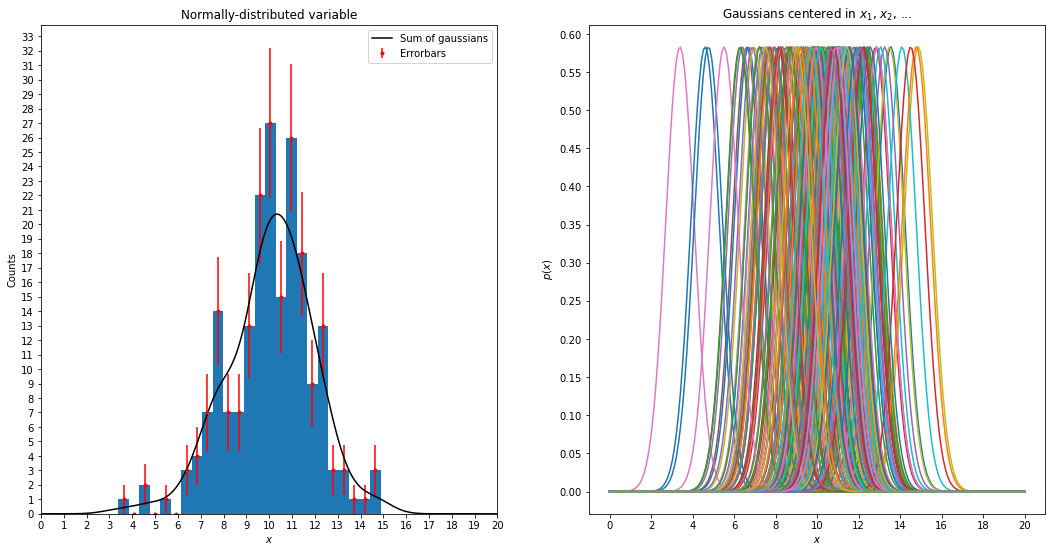

In [2]:
mu = 10
sigma = 2
N = 200
x = np.random.normal(mu, sigma, N)
fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,9))
y, bin_edges, _ = ax.hist(x, bins = 25)
bincenters = 0.5*(bin_edges[1:]+bin_edges[:-1])

ax.set_ylabel('Counts')
ax.set_xlabel('$x$')
ax.set_title('Normally-distributed variable')

ax.errorbar(bincenters, y, np.sqrt(y), ecolor = 'r', linestyle = 'none', fmt='.-r', label = 'Errorbars')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))

sigma_0 = 1.06*x.std()*(len(x))**(-1/5)
sigma = sigma_0*np.ones(len(x)) 
z = np.linspace(0, 20, N)
w = np.outer(z,np.ones(N)).T
val = ss.norm.pdf(w.T, x, sigma).T
for i in range(N):
    ax2.plot(w[i], val[i])
    
ax2.set_ylabel('$p(x)$')
ax2.set_xlabel('$x$')
ax2.set_title('Gaussians centered in $x_1$, $x_2$, ...')

ax2.xaxis.set_major_locator(MultipleLocator(2))
ax2.yaxis.set_major_locator(MultipleLocator(0.05))
#ax2.set_ylim(0, 0.5)

import scipy.integrate as si
val_sum = np.sum(val, axis = 0)
area = si.trapz(val_sum, w[0], dx = 0.1)
ax.plot(w[0], ((N*(bin_edges[1]-bin_edges[0]))/area)*val_sum, color = 'k', label = 'Sum of gaussians') 
ax.set_xlim(0, 20)
ax.legend()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

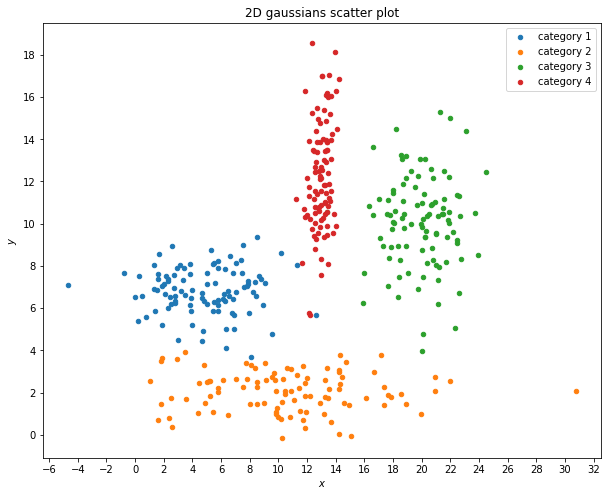

In [3]:
def plot_gaussians(means, devstds, N): #means, devstds arrays of tuples
    fig, ax = plt.subplots(figsize = (10,8))
    if len(means) != len(devstds):
        print("means and devstds of different size")
    n_categ = len(means)
    for i in range(n_categ):
        x = np.random.normal(means[i][0], devstds[i][0], N)
        y = np.random.normal(means[i][1], devstds[i][1], N)
        ax.scatter(x=x, y=y, marker='o', s=20, label = "category {}".format(i+1))
    ax.set_ylabel('$y$')
    ax.set_xlabel('$x$')
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.yaxis.set_major_locator(MultipleLocator(2))
    ax.set_title("2D gaussians scatter plot")
    ax.legend()
        
list_means = np.array([(5,7),(10,2),(20,10),(13,12)]) # values that one can tune
list_devstds= np.array([(3,1),(5,1),(2,2),(0.5,3)]) # values that one can tune
plot_gaussians(list_means, list_devstds, 100)

In [4]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

"wget" non è riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


FileNotFoundError: No such file or directory: 'two_categories_scatter_plot.png'

FileNotFoundError: No such file or directory: 'two_categories_scatter_plot.png'

<IPython.core.display.Image object>

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [5]:
import pandas as pd
data = np.load("residuals_261.npy", allow_pickle = True)
df = pd.DataFrame(data.item())
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [6]:
filtered_df = df[abs(df['residuals']) < 2.0]
filtered_df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [7]:
slope, intercept, r, p, se = ss.linregress(filtered_df['residuals'], filtered_df['distances'])
print("slope:", slope)
print("intercept:", intercept)
print("r:", r)
print("p:", p)
print("se:", se)

slope: 0.577913366635926
intercept: 10.025258299436526
r: 0.043403510522559086
p: 8.717037183576464e-06
se: 0.1298980963225655


In [8]:
n_bins = 20
x = np.arange(n_bins)+(20/(n_bins*2))
y = np.zeros(n_bins)
erry = np.zeros(n_bins)
for i in range(n_bins):
    bin_data = filtered_df[(filtered_df['distances']-(20/n_bins)*(1+i))*(filtered_df['distances']-(20/n_bins)*i) <= 0]
    y[i] = bin_data.mean().iloc[0]
    erry[i] = bin_data.std().iloc[0]
print(x)
print(y)
print(erry)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5]
[-0.23790635 -0.14007174 -0.1769304  -0.15851317 -0.12823252 -0.13562386
 -0.10279383 -0.07876432 -0.0926284  -0.09227192 -0.05149577 -0.10439892
 -0.09263436 -0.13268737 -0.15230155 -0.13734682 -0.13364765 -0.1598939
 -0.12144452 -0.05150568]
[0.48570856 0.4271031  0.42368921 0.41326547 0.38634833 0.40696775
 0.44116678 0.45321821 0.42706676 0.40937313 0.45233144 0.48549406
 0.49566136 0.44891528 0.45774574 0.47190754 0.43512106 0.4263715
 0.4122697  0.38061542]


<ErrorbarContainer object of 3 artists>

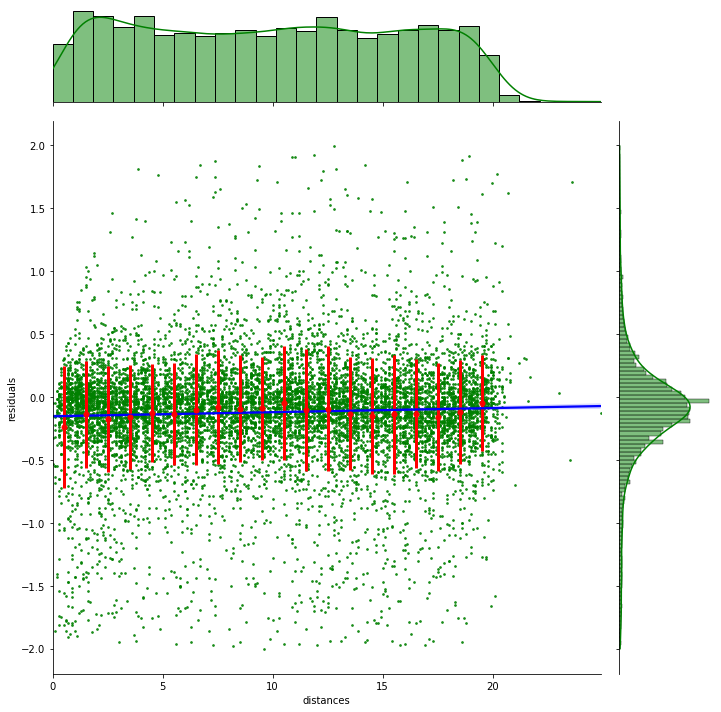

In [9]:
import seaborn as sns
jplot = sns.jointplot(x="distances", y="residuals", data=filtered_df, color = 'g', kind = 'reg', scatter_kws={'s': 3}, line_kws={"color": "b"}, height = 10)
jplot.ax_joint.errorbar(x, y, erry, linestyle = 'none', fmt = '.-r', ms= 10, linewidth = 3, label = 'Errorbars')
# it remains only to insert a legend for errorbars